<a href="https://colab.research.google.com/github/Husnain-Saghir1997/Digital_Reticular_Chemistry/blob/main/RAC's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pymatgen rdkit-pypi networkx pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 43.9 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=de026994ced974f52d3353dd0b99ef8b4f3cbf502d7309ee580472a109ebaa6a
  Stored in directory: /root/.cache/pip/wheels/16/fb/76/306387739cf9d53b1c39b0c8a

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from pymatgen.core.periodic_table import Element
import networkx as nx
import pandas as pd
import matplotlib.pyplot as mpl

molecule_list = {
    "Water": "O",
    "Methane": "C",
    "Ethanol": "CCO",
    "Acetic Acid": "CC(=O)O",
    "Benzene": "c1ccccc1",
    "Ammonia": "N"
}

# now define functions

# To get electronegativity of specified element
def get_elecN(symbol):
    try:
        return Element(symbol).X
    except:
        return 0.0

def draw_graph(mol):
  G= nx.Graph()
  for atom in mol.GetAtoms():
    G.add_node(atom.GetIdx(), symbol=atom.GetSymbol())
  for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    G.add_edge(i, j)
  return G

def rac_sum_product(G, mol, distance):
  total = 0
  for i in G.nodes:
    for j in G.nodes:
      if i < j and nx.shortest_path_length(G, i, j) == distance:
        total += get_elecN(mol.GetAtomWithIdx(i).GetSymbol()) * get_elecN(mol.GetAtomWithIdx(j).GetSymbol())
  return total

def rac_sum_diff(G, mol, distance):
  total = 0
  for i in G.nodes:
    for j in G.nodes:
      if i < j and nx.shortest_path_length(G, i, j) == distance:
        total += abs(get_elecN(mol.GetAtomWithIdx(i).GetSymbol()) - get_elecN(mol.GetAtomWithIdx(j).GetSymbol()))
  return total

results = []

for name, smiles in molecule_list.items():
  mol = Chem.AddHs(Chem.MolFromSmiles(smiles))
  G= draw_graph(mol)
  rac_prod_d1 = rac_sum_product(G, mol, 1)
  rac_prod_d2 = rac_sum_product(G, mol, 2)
  rac_diff_d1 = rac_sum_diff(G, mol, 1)
  rac_diff_d2 = rac_sum_diff(G, mol, 2)

  results.append({
    "Molecule": name,
    "RAC_Product_d1": rac_prod_d1,
    "RAC_Product_d2": rac_prod_d2,
    "RAC_Diff_d1": rac_diff_d1,
    "RAC_Diff_d2": rac_diff_d2
})

# save to CSV
df = pd.DataFrame(results)
df.to_csv("rac_descriptors.csv", index=False)
print(df)


      Molecule  RAC_Product_d1  RAC_Product_d2  RAC_Diff_d1  RAC_Diff_d2
0        Water         15.1360          4.8400         2.48         0.00
1      Methane         22.4400         29.0400         1.40         0.00
2      Ethanol         50.8925         76.9280         3.88         5.47
3  Acetic Acid         48.4445         66.3376         4.07         3.18
4      Benzene         72.6750        106.3350         2.10         4.20
5      Ammonia         20.0640         14.5200         2.52         0.00


# Visualization of Molecular Graphs

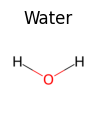

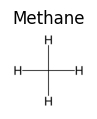

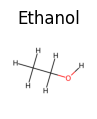

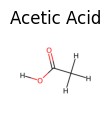

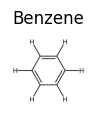

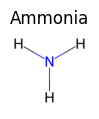

In [5]:
def visualize_mol(name, smiles):
  mol = Chem.MolFromSmiles(smiles)
  mol = Chem.AddHs(mol)
  img = Draw.MolToImage(mol, size=(200, 200))

  mpl.figure(figsize=(1, 1))
  mpl.imshow(img)
  mpl.axis('off')
  mpl.title(name)
  mpl.show()

for name, smiles in molecule_list.items():
  visualize_mol(name, smiles)

# Plot RACs

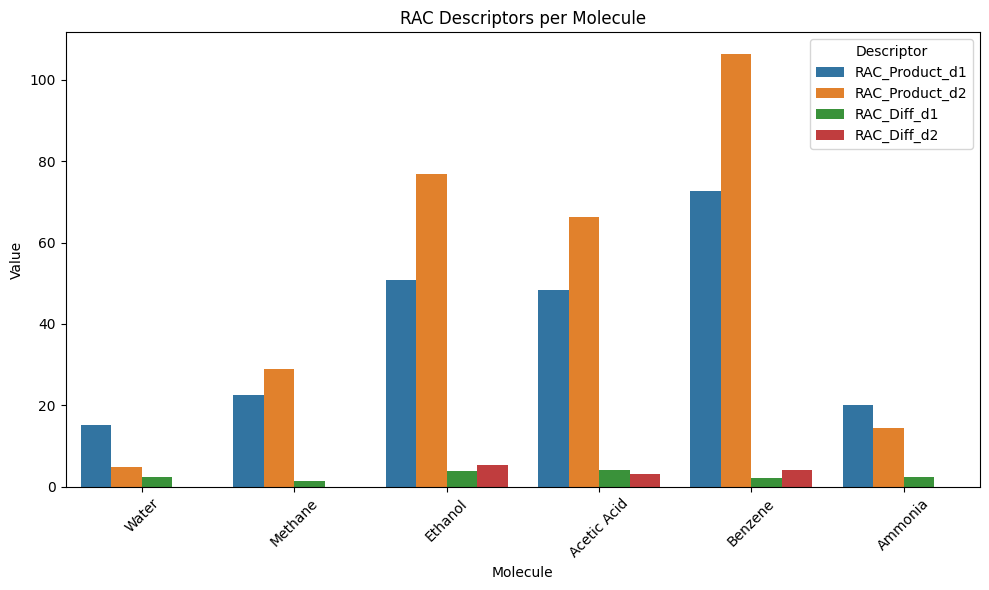

In [6]:
import seaborn as sns

df_melted = pd.melt(df, id_vars='Molecule',
                    value_vars=['RAC_Product_d1', 'RAC_Product_d2', 'RAC_Diff_d1', 'RAC_Diff_d2'],
                    var_name='Descriptor', value_name='Value')

mpl.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Molecule', y='Value', hue='Descriptor')
mpl.xticks(rotation=45)
mpl.title("RAC Descriptors per Molecule")
mpl.tight_layout()
mpl.show()


# Regression

In [29]:
# Add boiling points (in °C) — approximate values
boiling_points = {
    "Water": 100,
    "Methane": -161,
    "Ethanol": 78,
    "Acetic Acid": 118,
    "Benzene": 80,
    "Ammonia": -33
}

df['Boiling_Point'] = df['Molecule'].map(boiling_points)

R^2 Score: 0.8932131084510765
MSE: 1030.4460426064234


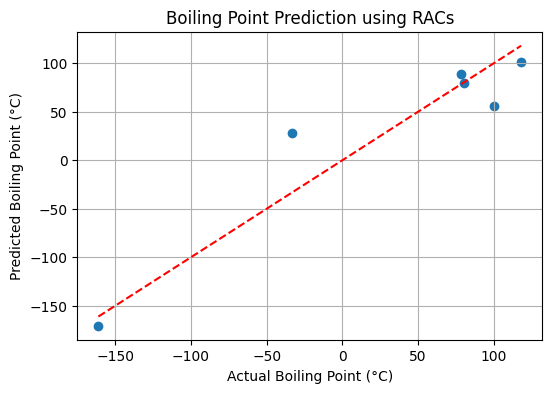

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['RAC_Product_d1', 'RAC_Product_d2', 'RAC_Diff_d1', 'RAC_Diff_d2']]
y = df['Boiling_Point']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print results
print("R^2 Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Plot predictions
mpl.figure(figsize=(6,4))
mpl.scatter(y, y_pred)
mpl.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
mpl.xlabel("Actual Boiling Point (°C)")
mpl.ylabel("Predicted Boiling Point (°C)")
mpl.title("Boiling Point Prediction using RACs")
mpl.grid(True)
mpl.show()
